<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-and-Load-Data" data-toc-modified-id="Import-and-Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import and Load Data</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Trying-Out-Models" data-toc-modified-id="Trying-Out-Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Trying Out Models</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Support Vector Machine</a></span></li><li><span><a href="#Decision-Trees-(Random-Forest,-Gradient-Boosting,-XGBoost)" data-toc-modified-id="Decision-Trees-(Random-Forest,-Gradient-Boosting,-XGBoost)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Decision Trees (Random Forest, Gradient Boosting, XGBoost)</a></span></li><li><span><a href="#Other-Models-(e.g.-Bagging-Classifier)" data-toc-modified-id="Other-Models-(e.g.-Bagging-Classifier)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Other Models (e.g. Bagging Classifier)</a></span></li></ul></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Evaluation</a></span></li></ul></div>

## Import and Load Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

In [ ]:
#!pip install xgboost

In [ ]:
#load in your data

In [ ]:
#df = pd.read_csv("reviews_0-250.csv", index_col = None)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/reviews_0-250.csv", index_col=None)

<ipython-input-3-31d6a6baa1de>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/reviews_0-250.csv", index_col=None)


In [ ]:
df.shape

(1044434, 19)

In [ ]:
from google.colab import drive
drive.mount('/home/reviews_0-250.csv')

Mounted at /home/reviews_0-250.csv


In [ ]:
df.isna().sum()

author_id                   0
is_recommended              0
total_feedback_count        0
total_neg_feedback_count    0
total_pos_feedback_count    0
skin_tone                   0
eye_color                   0
skin_type                   0
hair_color                  0
product_id                  0
brand_name                  0
price_usd                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044434 entries, 0 to 1044433
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1044434 non-null  int64  
 1   author_id                 1044434 non-null  object 
 2   rating                    1044434 non-null  int64  
 3   is_recommended            880263 non-null   float64
 4   helpfulness               496297 non-null   float64
 5   total_feedback_count      1044434 non-null  int64  
 6   total_neg_feedback_count  1044434 non-null  int64  
 7   total_pos_feedback_count  1044434 non-null  int64  
 8   submission_time           1044434 non-null  object 
 9   review_text               1043049 non-null  object 
 10  review_title              748158 non-null   object 
 11  skin_tone                 881096 non-null   object 
 12  eye_color                 841066 non-null   object 
 13  skin_type                 9

In [ ]:
df.shape

(1044434, 19)

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'is_recommended'}>],
       [<Axes: title={'center': 'helpfulness'}>,
        <Axes: title={'center': 'total_feedback_count'}>,
        <Axes: title={'center': 'total_neg_feedback_count'}>],
       [<Axes: title={'center': 'total_pos_feedback_count'}>,
        <Axes: title={'center': 'price_usd'}>, <Axes: >]], dtype=object)

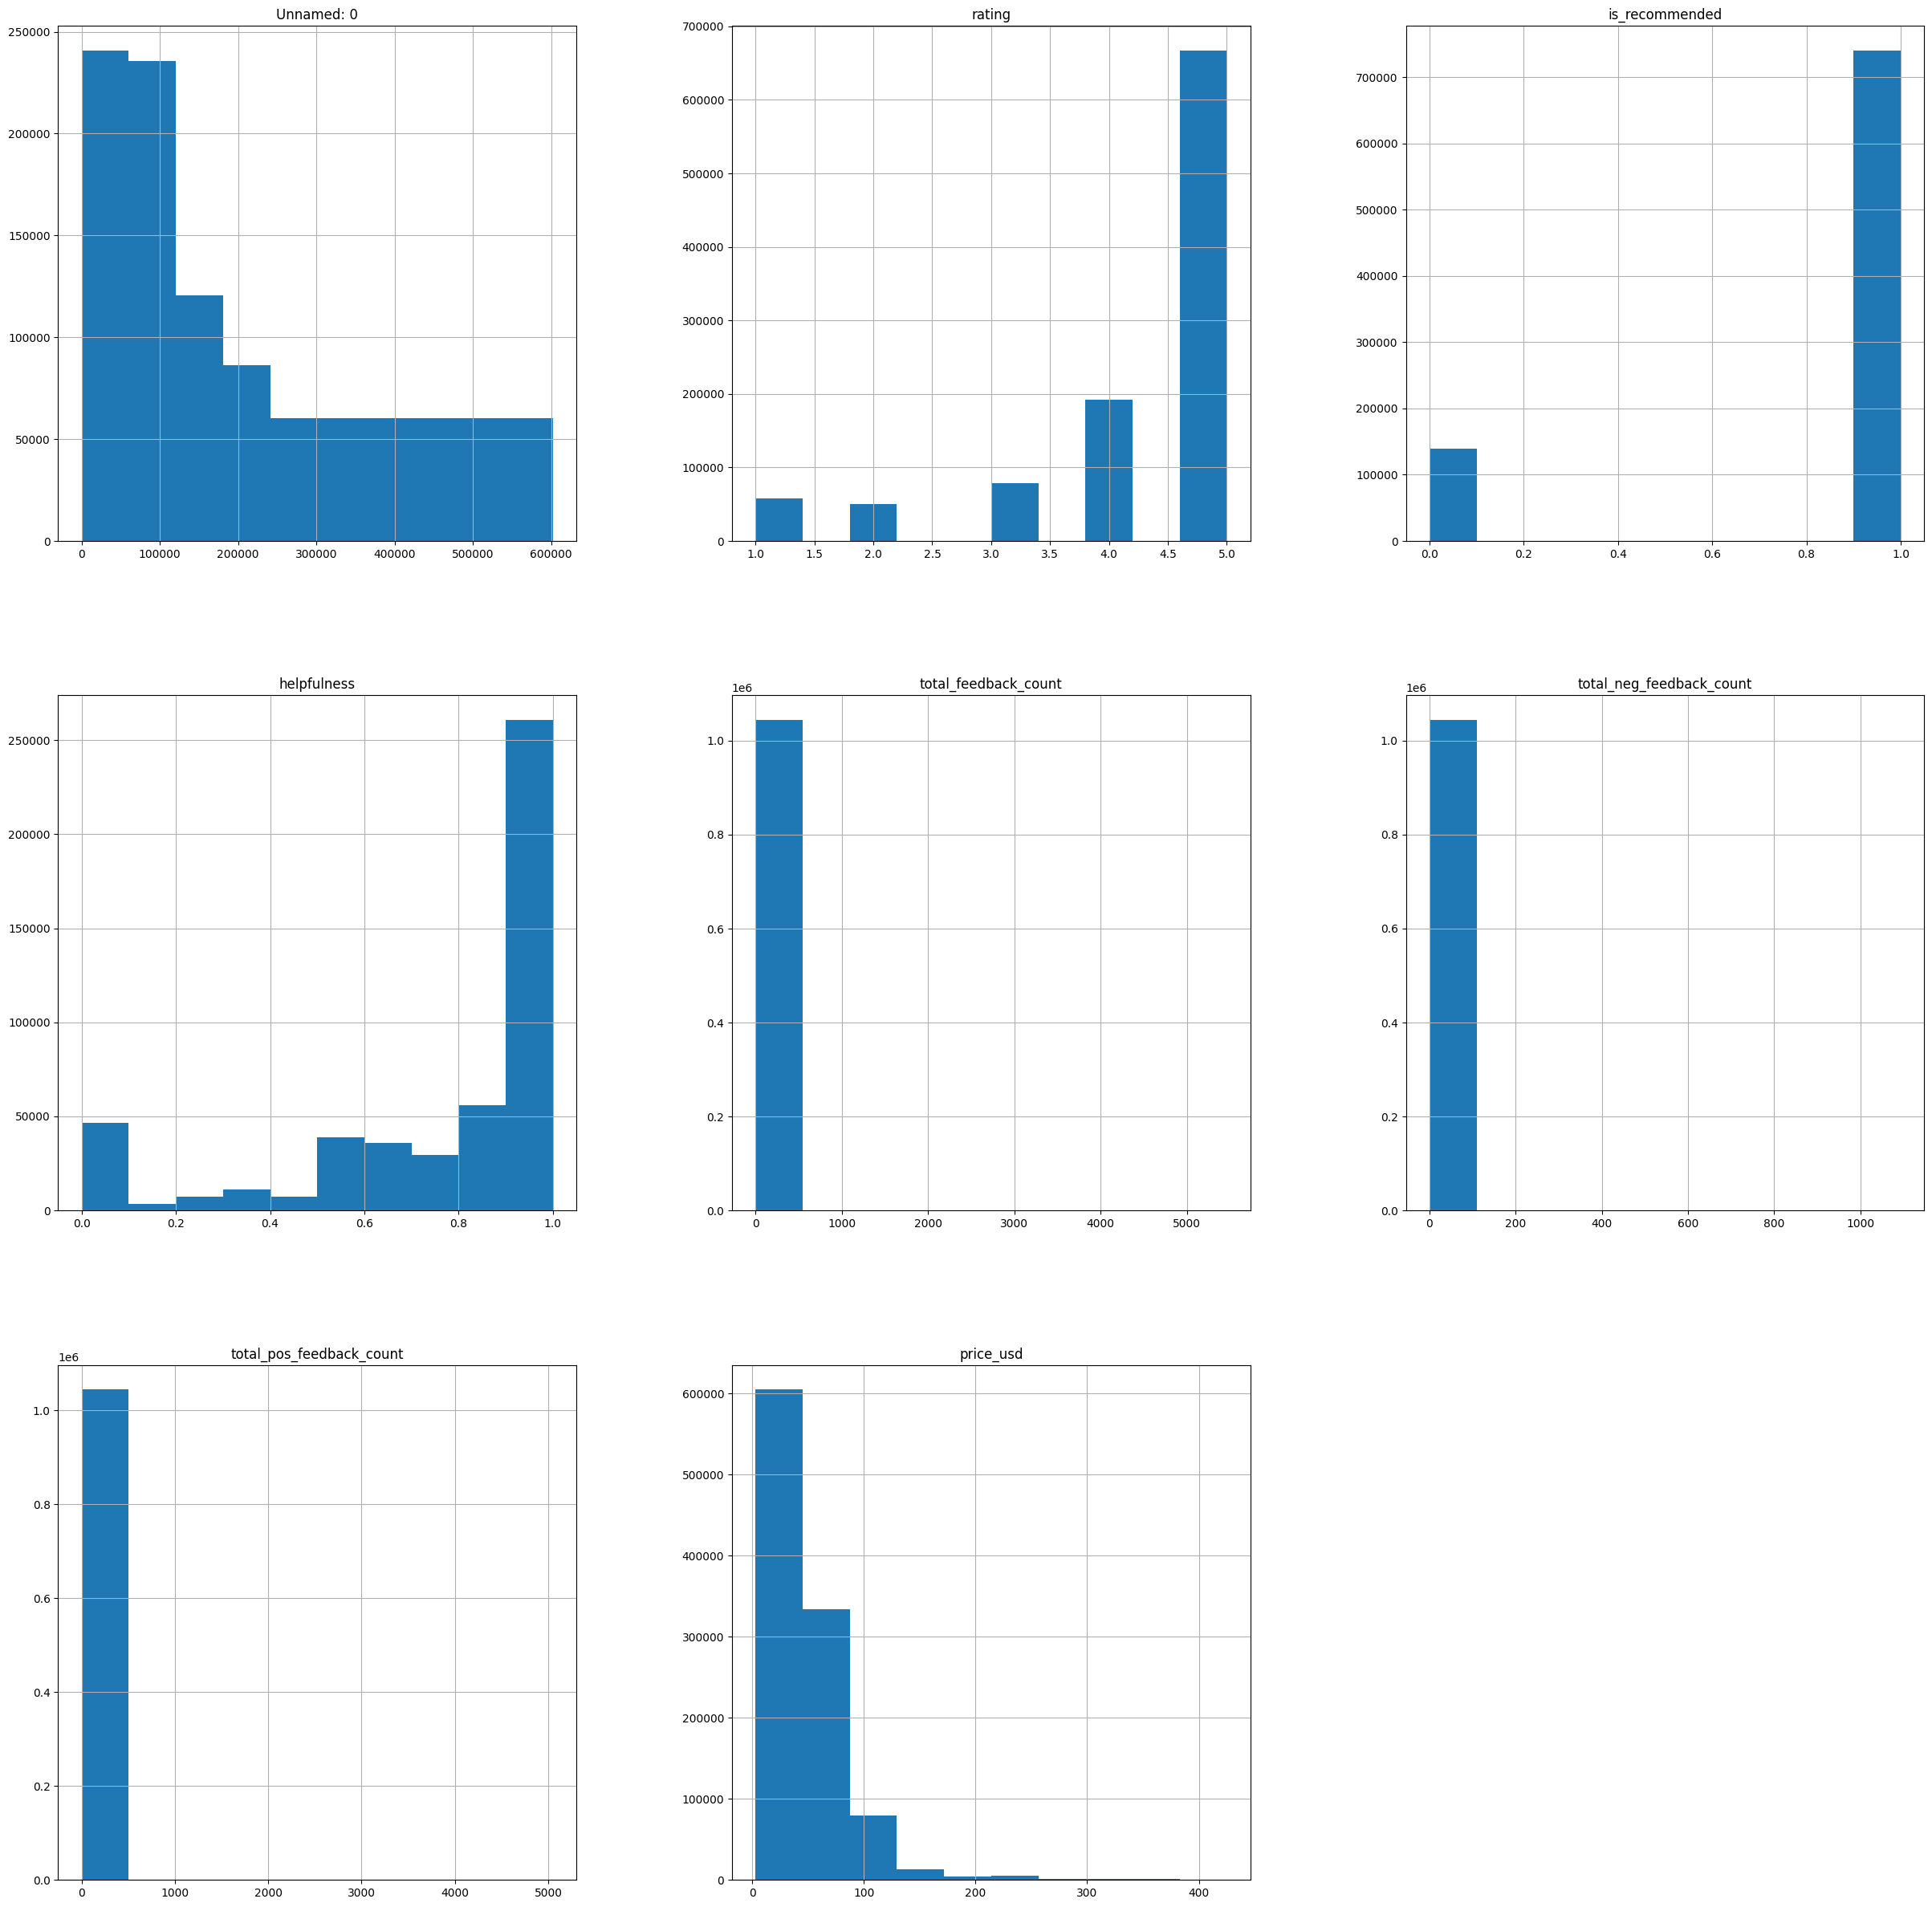

In [ ]:
df.hist(figsize=[30,30])

In [ ]:
df.describe()

,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,1.044434e+06,1.044434e+06,880263.000000,496297.000000,1.044434e+06,1.044434e+06,1.044434e+06,1.044434e+06
mean,2.073123e+05,4.303296e+00,0.841359,0.767792,3.979309e+00,8.450060e-01,3.134303e+00,4.815299e+01
std,1.748092e+05,1.143601e+00,0.365341,0.318644,2.276262e+01,5.062652e+00,1.979071e+01,3.761199e+01
min,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,6.527700e+04,4.000000e+00,1.000000,0.652174,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01
50%,1.433185e+05,5.000000e+00,1.000000,0.933333,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01
75%,3.410208e+05,5.000000e+00,1.000000,1.000000,3.000000e+00,0.000000e+00,2.000000e+00,6.200000e+01
max,6.021290e+05,5.000000e+00,1.000000,1.000000,5.464000e+03,1.094000e+03,5.050000e+03,4.250000e+02


<Axes: xlabel='rating', ylabel='is_recommended'>

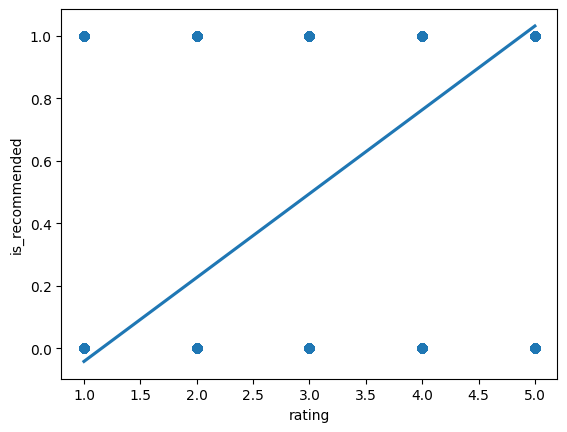

In [ ]:
sns.regplot(y='is_recommended', data=df, x='rating')

<Axes: xlabel='helpfulness', ylabel='is_recommended'>

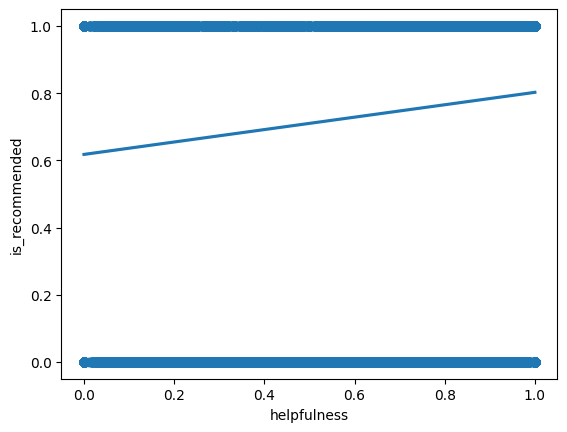

In [ ]:
sns.regplot(y='is_recommended', data=df, x='helpfulness')

<Axes: xlabel='price_usd', ylabel='is_recommended'>

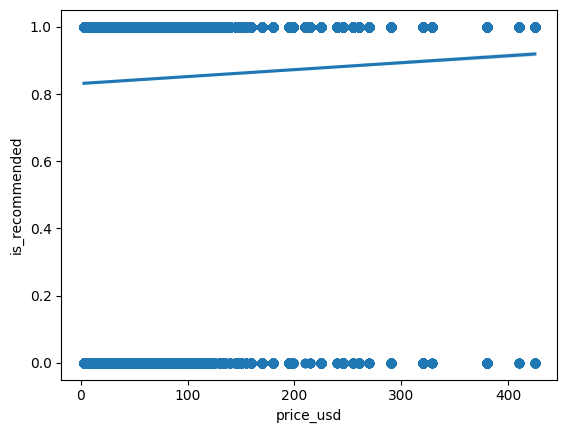

In [ ]:
sns.regplot(y='is_recommended', data=df, x='price_usd')

<Axes: xlabel='total_feedback_count', ylabel='is_recommended'>

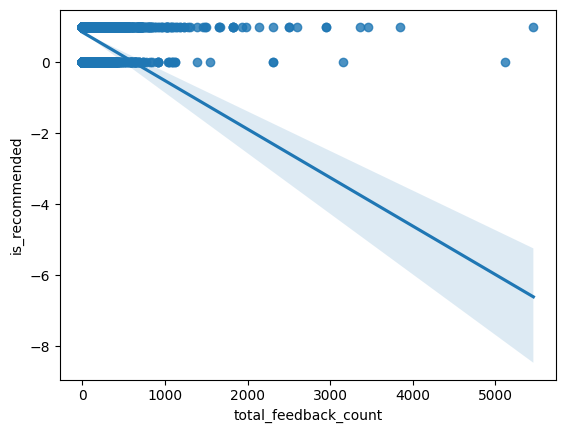

In [ ]:
sns.regplot(y='is_recommended', data=df, x='total_feedback_count')

<Axes: xlabel='total_neg_feedback_count', ylabel='is_recommended'>

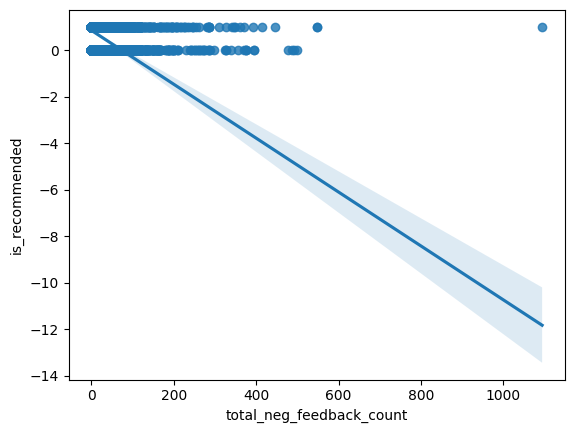

In [ ]:
sns.regplot(y='is_recommended', data=df, x='total_neg_feedback_count')

<Axes: xlabel='total_pos_feedback_count', ylabel='is_recommended'>

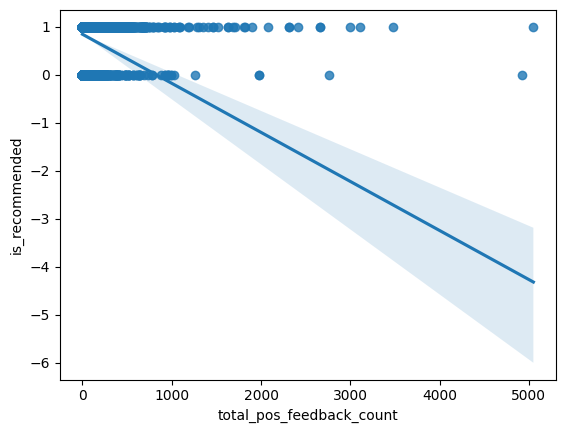

In [ ]:
sns.regplot(y='is_recommended', data=df, x='total_pos_feedback_count')

## Preprocessing

 - Handle missing values
 - Encode categorical variables, scale data (if you wish), feature selection, etc.
 - Split the dataset into features (X) and target variable (y)
 - Split into training and testing sets

In [ ]:
len(df.columns)

19

In [ ]:
df.isna().sum()

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              164171
helpfulness                 548137
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1385
review_title                296276
skin_tone                   163338
eye_color                   203368
skin_type                   107926
hair_color                  217917
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

Dropping columns with 50% of missing values

In [ ]:
threshold = len(df)* 0.5

In [ ]:
df.dropna(thresh = threshold, axis = 1, inplace = True)

In [ ]:
len(df.columns)

18

In [ ]:
df.columns

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

In [ ]:
df.isna().sum()[df.isna().sum()!=0]

is_recommended    164171
review_text         1385
review_title      296276
skin_tone         163338
eye_color         203368
skin_type         107926
hair_color        217917
dtype: int64

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df.dropna(subset=['is_recommended'], inplace=True)

In [ ]:
df.shape

(880263, 18)

In [ ]:
df.isna().sum()[df.isna().sum()!=0]

review_text       1385
review_title    276555
skin_tone        36999
eye_color        39869
skin_type        17828
hair_color       53746
dtype: int64

In [ ]:
df.head()

,Unnamed: 0,author_id,rating,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,2,0,2,2/1/23,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,0,0,0,3/21/23,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,0,0,0,3/21/23,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,0,0,0,3/20/23,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,0,0,0,3/20/23,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [ ]:
df.dropna(subset=['skin_type','review_text','review_title','skin_tone','eye_color','hair_color'], inplace=True)

In [ ]:
df.shape

(554349, 18)

In [ ]:
df.isna().sum()[df.isna().sum()!=0]

Series([], dtype: int64)

In [ ]:
df.head()

,Unnamed: 0,author_id,rating,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
2,2,5061282401,5,1.0,0,0,0,3/21/23,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
5,5,42802569154,4,1.0,1,0,1,3/19/23,The scent isn’t my favourite but it works grea...,Great!,lightMedium,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
6,6,6941883808,2,0.0,8,6,2,3/19/23,I’ll give this 2 stars for nice packaging and ...,Dried my lips out and clogged my pores,light,blue,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
7,7,27926227988,5,1.0,0,0,0,3/19/23,I use this at night or while I’m putting makeu...,Works great,fairLight,brown,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
8,8,7656791726,5,1.0,1,0,1,3/18/23,I love this stuff. I first had the sample size...,Must have.,light,blue,normal,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [ ]:
df.dropna(subset=['review_title'], inplace=True)

In [ ]:
df.skin_tone.value_counts()

skin_tone
light          156102
fair           121972
lightMedium    119088
medium          43334
mediumTan       38021
fairLight       36065
tan             20484
deep            13267
rich             3653
porcelain        1047
olive             969
dark              304
notSureST          42
ebony               1
Name: count, dtype: int64

In [ ]:
df.eye_color.value_counts()

eye_color
brown    290828
blue     108999
green     76468
hazel     75061
Grey       2729
gray        264
Name: count, dtype: int64

In [ ]:
df.hair_color.value_counts()

hair_color
brown       262168
blonde      129334
black       115779
auburn       20419
red          16300
brunette      6691
gray          3658
Name: count, dtype: int64

In [ ]:
df['product_id'] = df['product_id'].str.replace('P', '').astype(int)

In [ ]:
df.shape

(554349, 18)

In [ ]:
df.drop(columns=['Unnamed: 0','submission_time','product_name','rating','review_text','review_title'], inplace = True)

In [ ]:
df.head()

,author_id,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,skin_tone,eye_color,skin_type,hair_color,product_id,brand_name,price_usd
2,5061282401,1.0,0,0,0,light,brown,dry,blonde,420652,LANEIGE,24.0
5,42802569154,1.0,1,0,1,lightMedium,brown,normal,brown,420652,LANEIGE,24.0
6,6941883808,0.0,8,6,2,light,blue,combination,brown,420652,LANEIGE,24.0
7,27926227988,1.0,0,0,0,fairLight,brown,combination,brown,420652,LANEIGE,24.0
8,7656791726,1.0,1,0,1,light,blue,normal,blonde,420652,LANEIGE,24.0


In [ ]:
df.product_id.nunique()

1246

In [ ]:
df.is_recommended.nunique()

2

In [ ]:
df.shape

(554349, 12)

In [ ]:
df.author_id.nunique()

301370

In [ ]:
df['author_id'] = pd.to_numeric(df['author_id'], errors='coerce')

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns

In [ ]:
numerical_cols

Index(['author_id', 'is_recommended', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count', 'product_id',
       'price_usd'],
      dtype='object')

In [ ]:
categorical_cols

Index(['skin_tone', 'eye_color', 'skin_type', 'hair_color', 'brand_name'], dtype='object')

**AutoGluon**

Lets try autogluon to check what solution works best.

In [ ]:
df.isna().sum()

author_id                   32
is_recommended               0
total_feedback_count         0
total_neg_feedback_count     0
total_pos_feedback_count     0
skin_tone                    0
eye_color                    0
skin_type                    0
hair_color                   0
product_id                   0
brand_name                   0
price_usd                    0
dtype: int64

In [ ]:
df.dropna(subset=['author_id'], inplace=True)

In [ ]:
df2 = df.copy()

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df2, test_size=0.2, stratify=df2["is_recommended"])

In [ ]:
print(train_data.columns)
train_data.head()

Index(['author_id', 'is_recommended', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count', 'skin_tone',
       'eye_color', 'skin_type', 'hair_color', 'product_id', 'brand_name',
       'price_usd'],
      dtype='object')


,author_id,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,skin_tone,eye_color,skin_type,hair_color,product_id,brand_name,price_usd
349735,1.827333e+09,1.0,0,0,0,lightMedium,hazel,combination,brown,427536,Tatcha,40.0
991697,1.715735e+09,1.0,0,0,0,fairLight,hazel,combination,brown,480160,Caudalie,129.0
995285,1.188485e+10,1.0,8,2,6,fair,hazel,combination,brown,457442,SEPHORA COLLECTION,9.0
677174,8.731305e+09,1.0,12,0,12,fair,brown,oily,brown,479904,Herbivore,15.0
184735,5.817070e+09,1.0,0,0,0,lightMedium,brown,normal,black,460779,bareMinerals,65.0


In [ ]:
#pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.1/229.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.7/416.7 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.5/120.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
from autogluon.tabular.configs.hyperparameter_configs import get_hyperparameter_config
hyperparameters = get_hyperparameter_config('multimodal')

hyperparameters

{'NN_TORCH': {},
 'GBM': [{},
  {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
  'GBMLarge'],
 'CAT': {},
 'XGB': {},
 'AG_AUTOMM': {},
 'VW': {}}

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
time_limit = 3600  # for quick demonstration only, you should set this to longest time you are willing to wait (in seconds)
metric = 'roc_auc'  # specify your evaluation metric here

predictor = TabularPredictor(label="is_recommended", eval_metric = metric).fit(train_data, hyperparameters=hyperparameters, time_limit=time_limit, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240314_052203"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240314_052203/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 1037 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of AutoGluon: 2563 seconds.
Starting full fit now with num_stack_l

In [ ]:
# Best model
print("Best Model: ", predictor.get_model_best())
predictor.leaderboard(test_data)

<ipython-input-64-6dcb4cd7d63e>:2: DeprecationWarning: `get_model_best` has been deprecated and will be removed in version 1.2. Please use `model_best` instead. This will raise an error in the future!
  print("Best Model: ", predictor.get_model_best())


Best Model:  WeightedEnsemble_L3


,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM_BAG_L2,0.791575,0.786291,roc_auc,537.885967,422.693908,1749.395046,6.316762,4.891763,85.099104,2,True,4
1,WeightedEnsemble_L3,0.791505,0.786753,roc_auc,557.085070,435.615349,2437.157024,0.006252,0.103387,70.789913,3,True,8
2,LightGBMXT_BAG_L2,0.791301,0.785853,roc_auc,549.619599,429.420527,1803.866456,18.050393,11.618383,139.570514,2,True,5
3,LightGBM_BAG_L1,0.791118,0.786168,roc_auc,356.216888,272.033693,1199.612902,356.216888,272.033693,1199.612902,1,True,1
4,XGBoost_BAG_L2,0.790941,0.781712,roc_auc,534.864278,419.619916,1769.342219,3.295073,1.817772,105.046277,2,True,7
5,WeightedEnsemble_L2,0.790767,0.786386,roc_auc,531.573874,417.901608,1689.099765,0.004669,0.099464,24.803823,2,True,3
6,CatBoost_BAG_L2,0.790272,0.786142,roc_auc,532.711663,419.001816,2141.697493,1.142458,1.199671,477.401551,2,True,6
7,LightGBMXT_BAG_L1,0.781133,0.777183,roc_auc,175.352318,145.768452,464.683040,175.352318,145.768452,464.683040,1,True,2


In [ ]:
from sklearn.metrics import roc_auc_score

# Assuming your existing code for model training is correct and you've defined `train_data`, `test_data`, and `hyperparameters` appropriately.

# Your existing code for predictions
y_test = test_data["is_recommended"]
test_data_nolabel = test_data.drop(["is_recommended"], axis=1)
y_hat = predictor.predict(test_data_nolabel)
y_prob = predictor.predict_proba(test_data_nolabel)


### Matrix

In [ ]:
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, auc

In [ ]:
cm = confusion_matrix(y_hat, y_test)
cm

array([[ 4163,  2042],
       [13854, 90805]])

In [ ]:
print(classification_report(y_hat, y_test))

              precision    recall  f1-score   support

         0.0       0.23      0.67      0.34      6205
         1.0       0.98      0.87      0.92    104659

    accuracy                           0.86    110864
   macro avg       0.60      0.77      0.63    110864
weighted avg       0.94      0.86      0.89    110864



In [ ]:
y_prob[:10]

,0,1
3535,0.082961,0.917039
591040,0.068015,0.931985
747682,0.044720,0.955280
623397,0.226192,0.773808
166119,0.264104,0.735896
1036521,0.231775,0.768225
379720,0.263369,0.736631
477028,0.099902,0.900098
313741,0.056692,0.943308
956587,0.023357,0.976643


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_prob[1])

0.7915054588464309

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming y_test, y_hat (predicted labels), and y_prob (predicted probabilities) are already defined as per your previous code snippet.

# Calculate ROC AUC Score for the probabilities
roc_auc = roc_auc_score(y_test, y_prob[1])
print(f"ROC AUC Score: {roc_auc}")

# Calculate other evaluation metrics
accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)

# Print the scores
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


ROC AUC Score: 0.7915054588464309
Accuracy: 0.8566171164670227
Precision: 0.8676272465817559
Recall: 0.9780068284381832
F1 Score: 0.9195163691229633


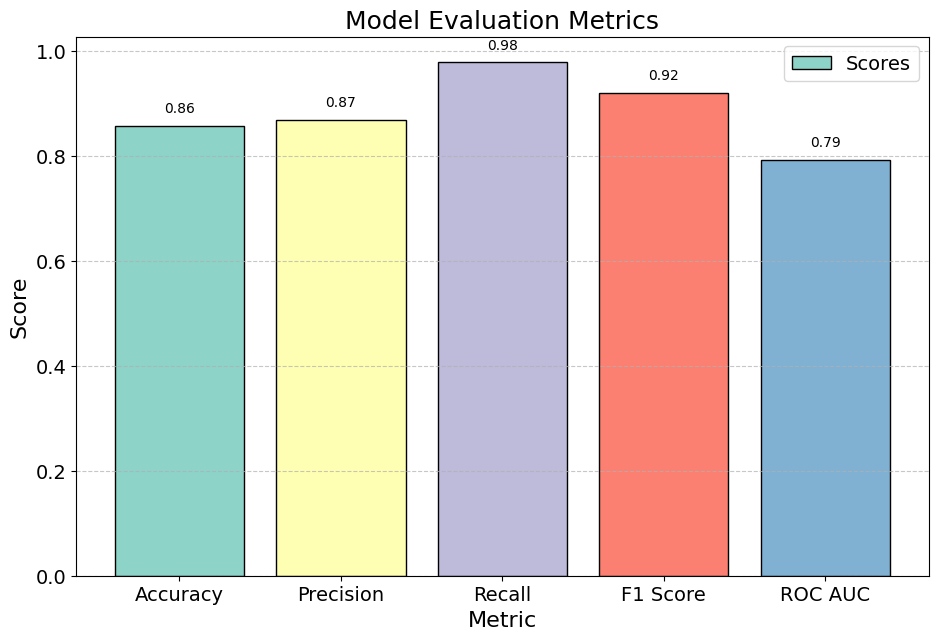

In [ ]:
import matplotlib.pyplot as plt

# Define labels for each score
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

# Define scores
scores = [accuracy, precision, recall, f1, roc_auc]

# Define subtle colors
colors = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3']

# Plot the scores
plt.figure(figsize=(11, 7))  # Larger figure size
bars = plt.bar(labels, scores, color=colors, edgecolor='black')

# Adding labels on top of bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{score:.2f}', ha='center', va='bottom')

# Adding title and labels
plt.title('Model Evaluation Metrics', fontsize=18)
plt.xlabel('Metric', fontsize=16)
plt.ylabel('Score', fontsize=16)

# Adding a legend
plt.legend(['Scores'], loc='upper right', fontsize=14)

# Adjusting grid and ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.show()
